In [2]:
import sys
import os 
sys.path.append(os.path.abspath('..'))


In [3]:
from environments.grid_world import GridworldEnv
from algorithms.montecarlo_first_visit_value_estimation import montecarlo_first_visit_value_estimation
import matplotlib.pyplot as plt
import numpy as np

Initial state (row,col): (0, 0)
Initial state index: 0
Goal: [(3, 3), (0, 0)] Goal index: [15, 0]


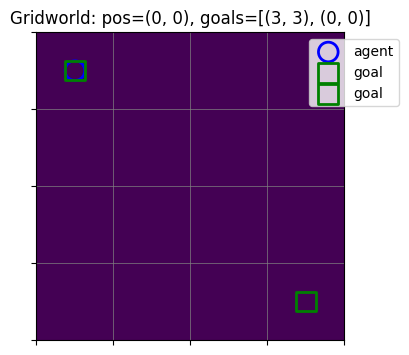

<Axes: title={'center': 'Gridworld: pos=(0, 0), goals=[(3, 3), (0, 0)]'}>

In [ ]:
# create env and render initial state
env = GridworldEnv(width=4, height=4, start=(0,0), goals=[(3,3), (0, 0)],
                   step_reward=-1, goal_reward=-1, seed=123)

# Reset and print a few pieces of information
init_state = env.reset()
print("Initial state (row,col):", init_state)
print("Initial state index:", env.state_to_index(init_state))
print("Goal:", env.goals, "Goal index:", [env.state_to_index(goal) for goal in env.goals])

# Render to inspect visually
env.render()

In [5]:
Vs = montecarlo_first_visit_value_estimation(env)

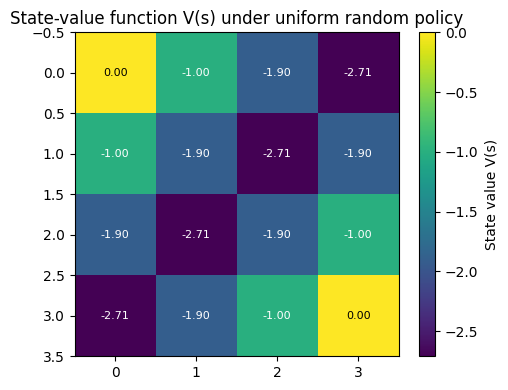

In [6]:
# Value heatmap: reshape V into (height, width)

plt.figure(figsize=(5,4))
im = plt.imshow(Vs, origin='upper', interpolation='nearest')
plt.colorbar(im, label='State value V(s)')
plt.title("State-value function V(s) under uniform random policy")
# annotate values
for r in range(env.height):
  for c in range(env.width):
    plt.text(c, r, f"{Vs[r,c]:.2f}", ha='center', va='center', fontsize=8, color='white' if Vs[r,c] < Vs.max()/2 else 'black')
plt.tight_layout()
plt.show()